In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=5fcbbe3cfd8f0a663a367eb17f2674414a9928609f7cbe2ba747a70d2b706b29
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [3]:
df_train = pd.read_excel("/kaggle/input/bemoc-stop-dataset/BEmoC7k.xlsx")

In [4]:
df_train.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

1093


In [7]:
df_train['classes'].value_counts()

classes
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [8]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text


In [9]:
df_train['TEXT'] = df_train['TEXT'].apply(remove_stopwords)

In [10]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

712


In [11]:
df_train['TEXT'] 

0                                              নাইমা জানি
1                                   ভাই আপনাদের ভাল লাগছে
2         গাঞ্জা খাইয়া নিউজ শেয়ার দিগন্ত বয়কটে জরিমানা
3                            ধন্যবাদ স্যার যশোরে অনুষ্ঠান
4                       বর্তমানে মুসলমান মারে হয়েছে ঈশ্বর
                              ...                        
6995    হে আল্লাহ দেশের সহায়ক মহামারী নিকট আশ্রয় চাই...
6996    ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান নি...
6997    বছরের সবচেয়ে সেরা ভিডিও দেখেছি দেশের সাথে ভূটা...
6998              কিরে মিথ্যা কথা কস গতদিন আসিফ আসছি খালি
6999    ভাইরেভাই বেস্ট এইটা বেস্ট এইরকম পারফেক্ট গল্প ...
Name: TEXT, Length: 7000, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [13]:
X_train  =  train_df['TEXT'].values.tolist()
y_train = train_df['classes'].tolist()

In [14]:
X_test =  test_df['TEXT'].values.tolist()
y_test = test_df['classes'].tolist()

In [15]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 54.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 10.3 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=d2a64ada55f9865cb7637cda4fca34232635eafe500b57d685603966af8cb207
  Stored in directory: /roo

In [16]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [17]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 14
	95percentile : 29
	99percentile : 40


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 15
	95percentile : 29
	99percentile : 44


In [18]:
print(trn)

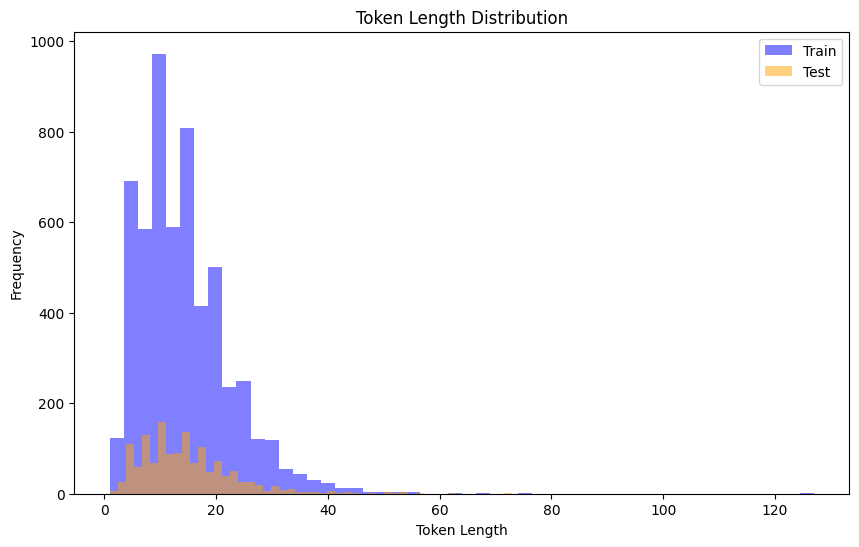

In [19]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [20]:
model = t.get_classifier()

In [21]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [22]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [23]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
700/700 [==============================] - 444s 597ms/step - loss: 1.6611 - accuracy: 0.2959 - val_loss: 1.4735 - val_accuracy: 0.4307
Epoch 2/10
700/700 [==============================] - 414s 591ms/step - loss: 1.3629 - accuracy: 0.4689 - val_loss: 1.2513 - val_accuracy: 0.5071
Epoch 3/10
700/700 [==============================] - 414s 591ms/step - loss: 1.1401 - accuracy: 0.5623 - val_loss: 1.2991 - val_accuracy: 0.5000
Epoch 4/10
700/700 [==============================] - 414s 591ms/step - loss: 0.9836 - accuracy: 0.6166 - val_loss: 1.2195 - val_accuracy: 0.5350
Epoch 5/10
700/700 [==============================] - 414s 591ms/step - loss: 0.8407 - accuracy: 0.6877 - val_loss: 1.1462 - val_accuracy: 0.5779
Epoch 6/10
700/700 [==============================] - 414s 591ms/step - loss: 0.6655 - accuracy: 0.7561 - val_loss: 1.2641 - val_accuracy: 0.5721
Epoch 7/10
700/700 [==============================] - 414s 59

In [24]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [25]:
classes=t.get_classes()

In [26]:
cm = learner.validate(class_names=t.get_classes())

44/44 [==============================] - 16s 299ms/step
              precision    recall  f1-score   support

       anger       0.47      0.40      0.43       211
     disgust       0.49      0.54      0.51       271
        fear       0.74      0.72      0.73       192
         joy       0.72      0.72      0.72       305
     sadness       0.54      0.57      0.55       265
    surprise       0.53      0.51      0.52       156

    accuracy                           0.59      1400
   macro avg       0.58      0.58      0.58      1400
weighted avg       0.59      0.59      0.58      1400

